In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Faces.jpg to Faces.jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [ ]:
image_path = 'Faces.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
import cv2
import os
from tkinter import Tk, Canvas, Scrollbar, Frame, Label
from PIL import Image, ImageTk

In [ ]:
def display_before_after(before, after, title_before='Before', title_after='After'):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(before)
    axs[0].set_title(title_before)
    axs[0].axis('off')
    axs[1].imshow(after)
    axs[1].set_title(title_after)
    axs[1].axis('off')
    plt.show()

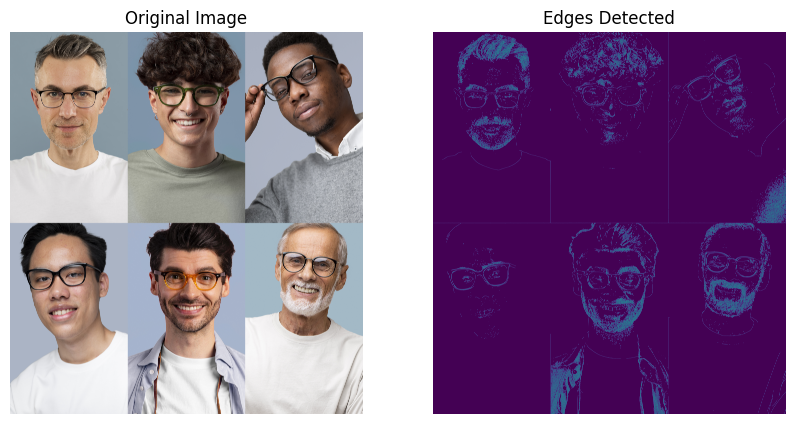

In [ ]:
edges = cv2.Canny(image, 100, 200)
display_before_after(image_rgb, edges, 'Original Image', 'Edges Detected')

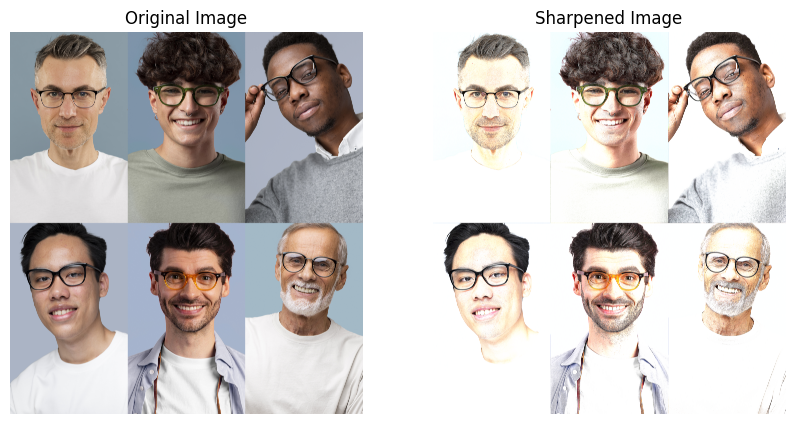

In [ ]:
kernel_sharpening = np.array([
    [-1, -1, -1, -1, -1],
    [-1,  1,  1,  1, -1],
    [-1,  1,  10,  1, -1],
    [-1,  1,  1,  1, -1],
    [-1, -1, -1, -1, -1]
])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
display_before_after(image_rgb, cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB), 'Original Image', 'Sharpened Image')

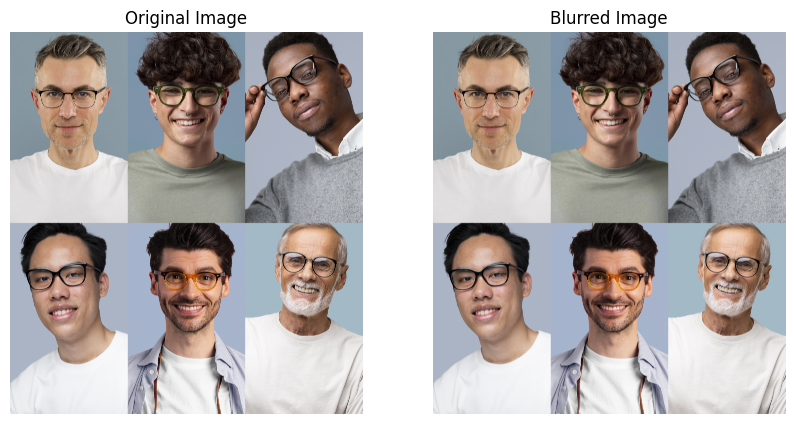

In [ ]:
blurred = cv2.GaussianBlur(image, (15, 15), 0)
display_before_after(image_rgb, cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB), 'Original Image', 'Blurred Image')

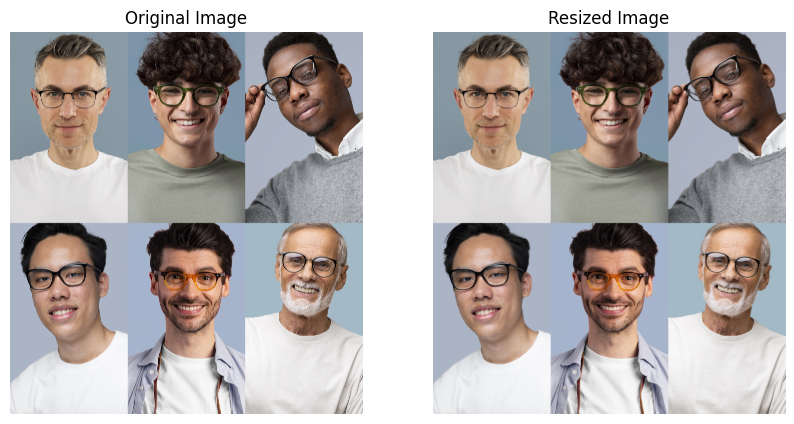

In [ ]:
resized = cv2.resize(image, (image.shape[1]//2, image.shape[0]//2))
display_before_after(image_rgb, cv2.cvtColor(resized, cv2.COLOR_BGR2RGB), 'Original Image', 'Resized Image')

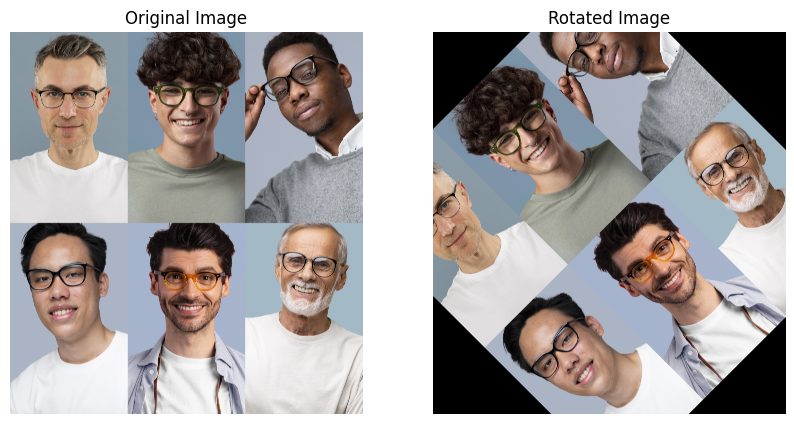

In [ ]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
display_before_after(image_rgb, cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB), 'Original Image', 'Rotated Image')

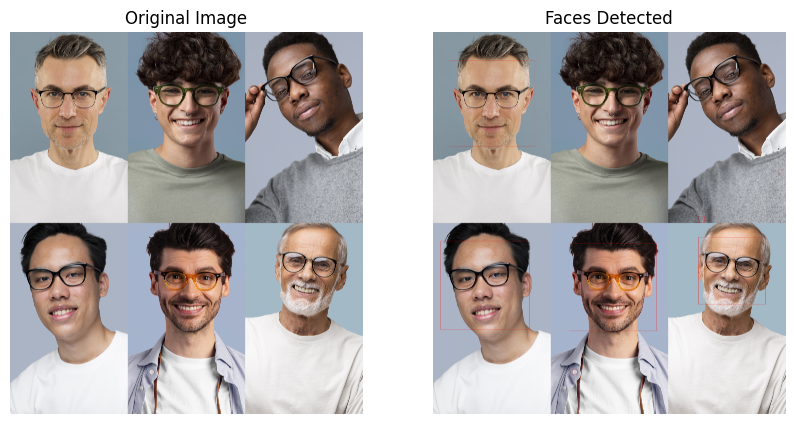

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
face_detected_image = image_rgb.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(face_detected_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
display_before_after(image_rgb, face_detected_image, 'Original Image', 'Faces Detected')

In [ ]:
!pip install opencv-contrib-python==4.7.0.72

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_path = 'Faces.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [ ]:
for (x, y, w, h) in faces:
  face_roi = image_rgb[y:y+h, x:x+w]
  enhanced_face = cv2.bilateralFilter(face_roi, d=9, sigmaColor=75, sigmaSpace=75)
  kernel_sharpening = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  enhanced_face = cv2.filter2D(enhanced_face, -1, kernel_sharpening)
  image_rgb[y:y+h, x:x+w] = enhanced_face

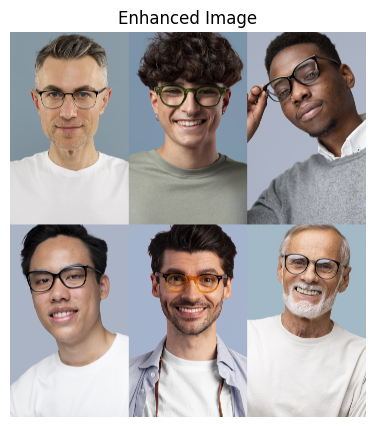

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.title('Enhanced Image')
plt.axis('off')
plt.show()